In [19]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

plt.style.use('bmh')
%matplotlib inline

In [20]:
df = pd.read_csv('monthly-milk-production-pounds-p.csv', index_col='Month')
df.dropna(inplace=True)
df.index = pd.to_datetime(df.index)
df.head()

,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [21]:
df.columns = ['Milk in Pounds per Cow']

In [22]:
df.head()

,Milk in Pounds per Cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [23]:
df.tail()

,Milk in Pounds per Cow
Month,
1975-08-01,858.0
1975-09-01,817.0
1975-10-01,827.0
1975-11-01,797.0
1975-12-01,843.0


In [24]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Milk in Pounds per Cow,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


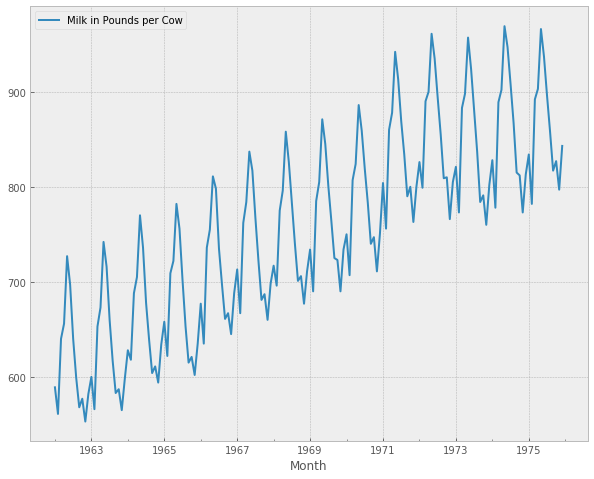

In [25]:
# Step2: To visualiza the data
df.plot(figsize=(10,8))

In [26]:
time_series = df['Milk in Pounds per Cow']
type(time_series)

pandas.core.series.Series

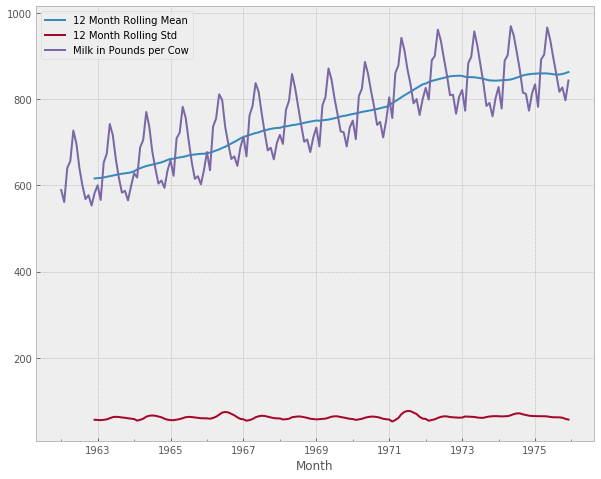

In [27]:
time_series.rolling(window=12).mean().plot(figsize=(10,8), label='12 Month Rolling Mean')
time_series.rolling(window=12).std().plot(figsize=(10,8), label='12 Month Rolling Std')
time_series.plot()

plt.legend()

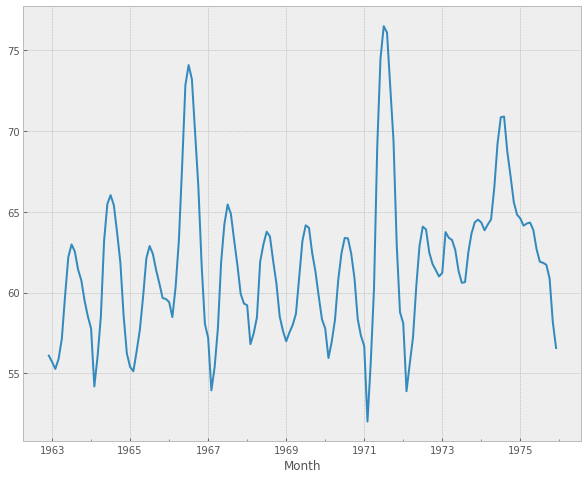

In [28]:
time_series.rolling(window=12).std().plot(figsize=(10,8), label='12 Month Rolling Std')

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [37]:
decomp = seasonal_decompose(time_series, freq= 12)

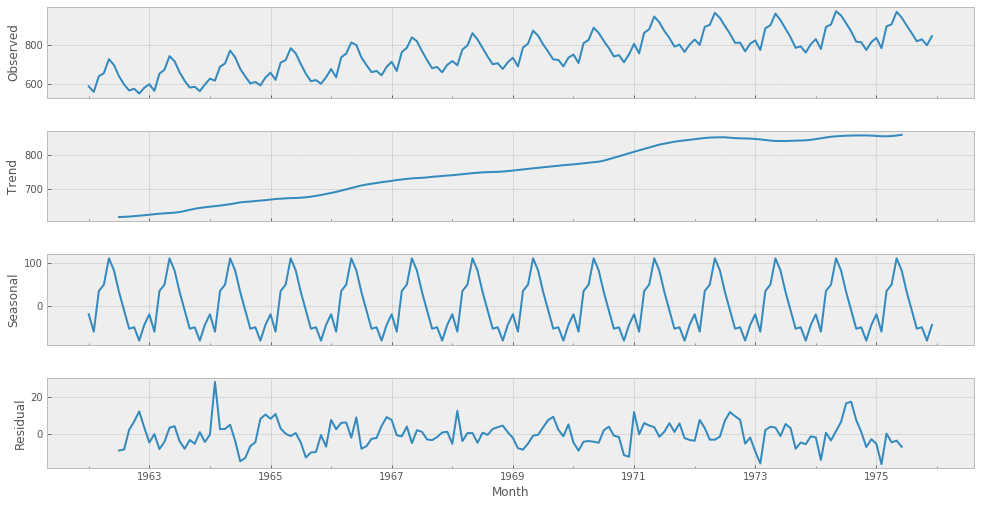

In [36]:
fig = decomp.plot()
fig.set_dpi = 320
fig.set_size_inches(15,8)

In [39]:
from statsmodels.tsa.stattools import adfuller

In [40]:
result = adfuller(df['Milk in Pounds per Cow'])

In [44]:
result

(-1.303811587422125,
 0.62742670860303362,
 13,
 154,
 {'1%': -3.4735425281962091,
  '10%': -2.5768780536346769,
  '5%': -2.880497674144038},
 1115.1730447395112)

In [47]:
def adf_check(time_series):
    result = adfuller(time_series)
    print(' Augmented Dicky-Fuller Test')
    labels = ['ADF Test Statistics', 'p-value', '# of lags', 'Num of Observations used']
    
    for value, label in zip(result, labels):
        print(label + " : " + str(value))
    
    if result[1] <= 0.05:
        print('Strong evidence against null hypothesis')
        print('reject null hypothesis')
        print('Data has no unit root and is stationary')
    else:
        print('weak evidence against null hypothesis')
        print('Fail to reject null hypothesis')
        print('Data has a unit root, it is non-stationary')

In [48]:
adf_check(df['Milk in Pounds per Cow'])

 Augmented Dicky-Fuller Test
ADF Test Statistics : -1.30381158742
p-value : 0.627426708603
# of lags : 13
Num of Observations used : 154
weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root, it is non-stationary


In [49]:
df['First Difference'] = df['Milk in Pounds per Cow'] - df['Milk in Pounds per Cow'].shift(1)

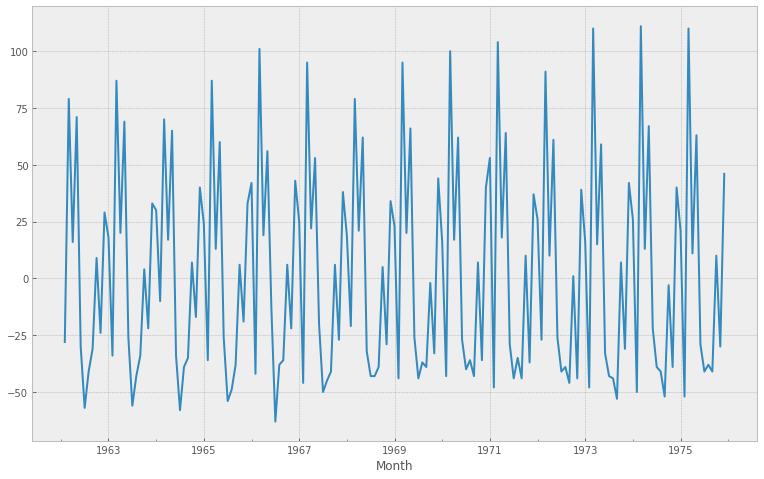

In [53]:
df['First Difference'].dropna().plot(figsize=(13,8))

In [54]:
adf_check(df['First Difference'].dropna())

 Augmented Dicky-Fuller Test
ADF Test Statistics : -3.05499555865
p-value : 0.0300680040018
# of lags : 14
Num of Observations used : 152
Strong evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationary


In [55]:
df['Second Difference'] = df['First Difference'] - df['First Difference'].shift(1)

In [56]:
df['Second Difference'].head()

Month
1962-01-01      NaN
1962-02-01      NaN
1962-03-01    107.0
1962-04-01    -63.0
1962-05-01     55.0
Name: Second Difference, dtype: float64

In [57]:
adf_check(df['Second Difference'].dropna())

 Augmented Dicky-Fuller Test
ADF Test Statistics : -14.3278736456
p-value : 1.11269893321e-26
# of lags : 11
Num of Observations used : 154
Strong evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationary


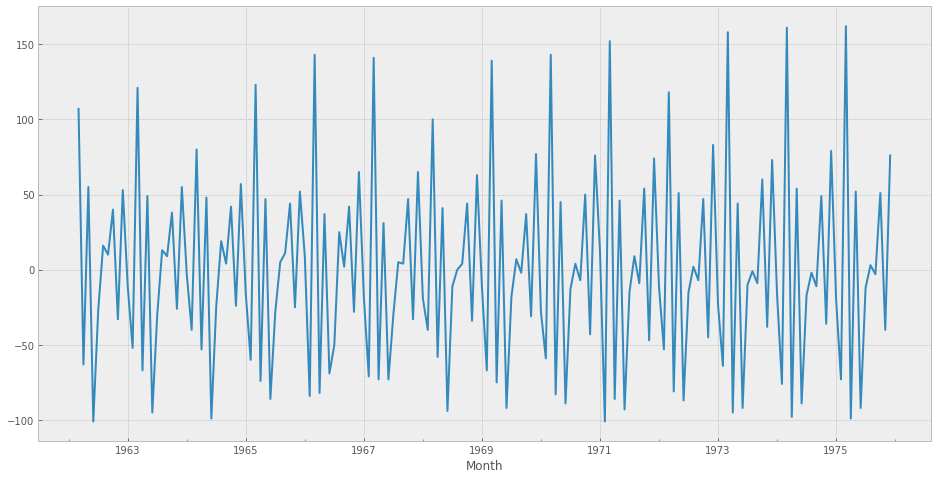

In [59]:
df['Second Difference'].plot(figsize=(16,8))

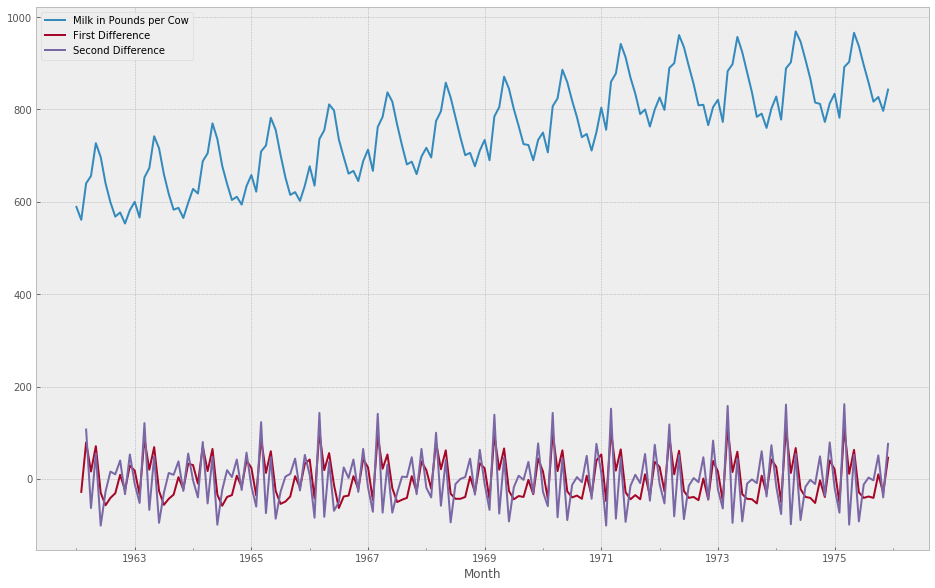

In [61]:
df[['Milk in Pounds per Cow', 'First Difference', 'Second Difference']].plot(figsize=(16,10))

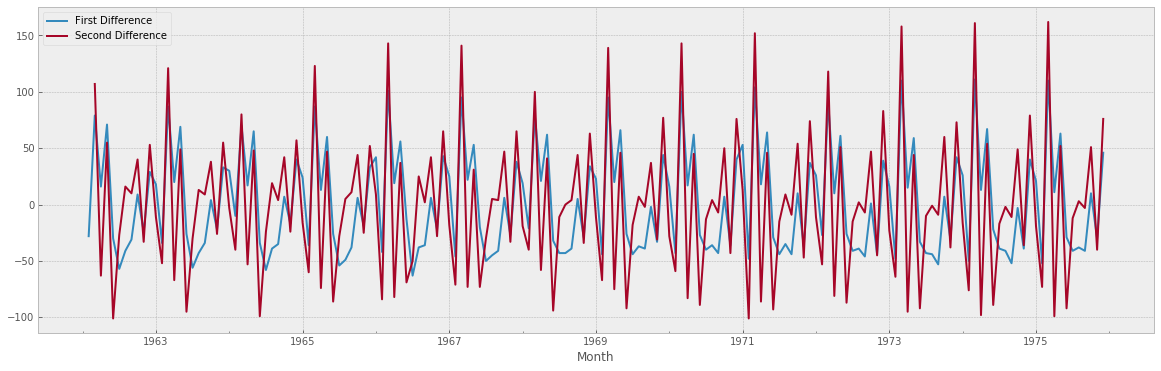

In [64]:
df[['First Difference', 'Second Difference']].plot(figsize=(20,6))

In [65]:
df.head()

,Milk in Pounds per Cow,First Difference,Second Difference
Month,,,
1962-01-01,589.0,NaN,NaN
1962-02-01,561.0,-28.0,NaN
1962-03-01,640.0,79.0,107.0
1962-04-01,656.0,16.0,-63.0
1962-05-01,727.0,71.0,55.0


In [66]:
df['Seasonal Difference'] = df['Milk in Pounds per Cow'] - df['Milk in Pounds per Cow'].shift(12)

In [69]:
df['Seasonal Difference'].head(13)

Month
1962-01-01     NaN
1962-02-01     NaN
1962-03-01     NaN
1962-04-01     NaN
1962-05-01     NaN
1962-06-01     NaN
1962-07-01     NaN
1962-08-01     NaN
1962-09-01     NaN
1962-10-01     NaN
1962-11-01     NaN
1962-12-01     NaN
1963-01-01    11.0
Name: Seasonal Difference, dtype: float64

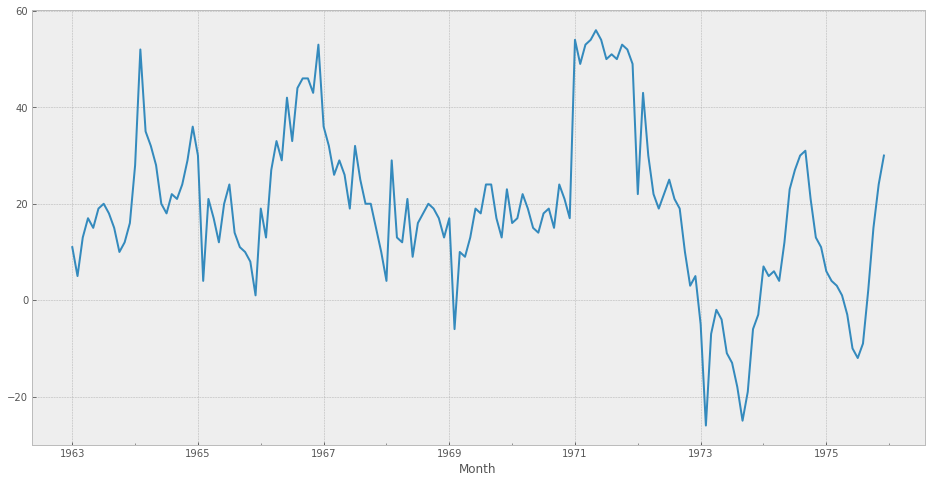

In [70]:
df['Seasonal Difference'].dropna().plot(figsize=(16,8))

In [71]:
adf_check(df['Seasonal Difference'].dropna())

 Augmented Dicky-Fuller Test
ADF Test Statistics : -2.33541931436
p-value : 0.160798805277
# of lags : 12
Num of Observations used : 143
weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root, it is non-stationary


In [76]:
df['Seasonal First Difference'] = df['First Difference'] - df['Seasonal Difference'].shift(12)

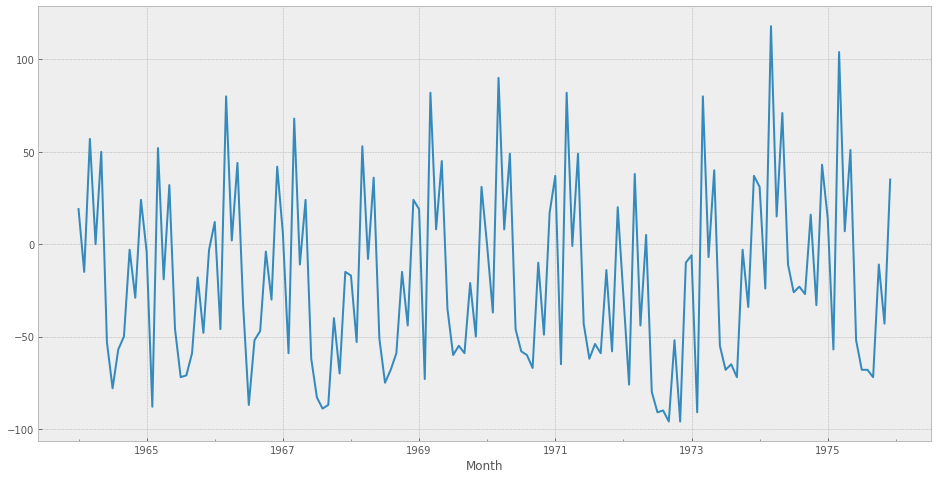

In [77]:
df['Seasonal First Difference'].dropna().plot(figsize=(16,8))

In [78]:
adf_check(df['Seasonal First Difference'].dropna())

 Augmented Dicky-Fuller Test
ADF Test Statistics : -3.5245492757
p-value : 0.00737855141524
# of lags : 14
Num of Observations used : 129
Strong evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationary


# Keep going to Next Part

## Autocorrelation